In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"

df_list = pd.read_html(
    url, 
    match="Коефіцієнт народжуваності в регіонах України", 
    storage_options={'User-Agent': 'Mozilla/5.0'}
)
df = df_list[0]


1-5 Завдання

In [3]:
print("1.Перші рядки таблиці")
df.head()

1.Перші рядки таблиці


,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—


In [4]:
print(f"2.Кількість рядків: {df.shape[0]}, Кількість стовпців {df.shape[1]}")
df = df.replace('—', np.nan)

2.Кількість рядків: 28, Кількість стовпців 9


In [5]:
print(f"4.\n{df.dtypes}")

4.
Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object


In [6]:
num_columns = df.columns[1:]
df[num_columns] = df[num_columns].apply(pd.to_numeric)
print("5.\n", df.dtypes)

5.
 Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object


In [7]:
missing = df.isnull().sum() / len(df)
print(f"6.Частка пропусків:\n {missing}")

6.Частка пропусків:
 Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64


In [8]:
df = df.iloc[:-1]
print("7\n",df)

7
                Регіон   1950   1960   1970  1990  2000  2012   2014   2019
0                Крим  230.0  206.0  160.0   130    73   126    NaN    NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109.0   76.0
2           Волинська  247.0  250.0  179.0   153   112   148  141.0  101.0
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111.0   71.0
4            Донецька  271.0  214.0  140.0   109    61    98   82.0    NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120.0   79.0
6        Закарпатська  314.0  273.0  207.0   168   115   151  146.0  104.0
7          Запорізька  219.0  197.0  150.0   124    71   106  106.0   68.0
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122.0   88.0
9            Київська  204.0  189.0  156.0   123    73   122  121.0   80.0
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108.0   68.0
11          Луганська  262.0  235.0  144.0   116    62    96   51.0    NaN
12          Львівська 

In [9]:
df[num_columns] = df[num_columns].fillna(df[num_columns].mean())
df.isnull().sum()

Регіон    0
1950      0
1960      0
1970      0
1990      0
2000      0
2012      0
2014      0
2019      0
dtype: int64

In [10]:
mean_2019 = df['2019'].mean()
regions_above = df[df['2019'] > mean_2019]['Регіон'].tolist()
print(f"Середній рівень по Україні у 2019: {mean_2019:.2f}")
print(f"9.Регіони з вищою народжуваністю:\n{regions_above}")

Середній рівень по Україні у 2019: 80.17
9.Регіони з вищою народжуваністю:
['Волинська', 'Закарпатська', 'Івано-Франківська', 'Львівська', 'Одеська', 'Рівненська', 'Херсонська', 'Чернівецька', 'Київ']


In [11]:
highest_2014 = df['2014'].idxmax()
region_2014 = df.loc[highest_2014, 'Регіон']

print(f"\n Регіон з навищою народжуваністю у 2014: {region_2014}")


 Регіон з навищою народжуваністю у 2014: Рівненська


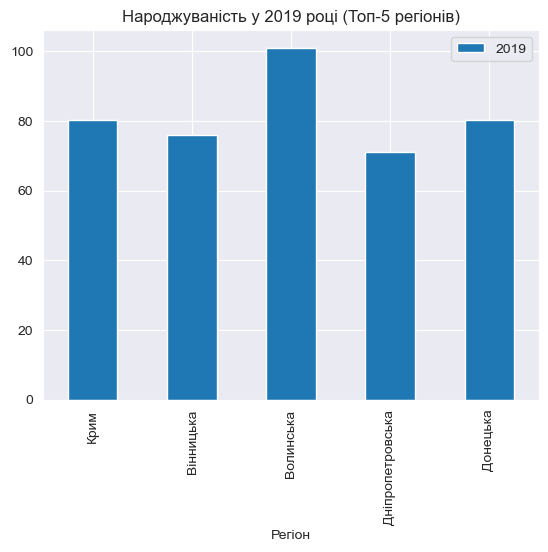

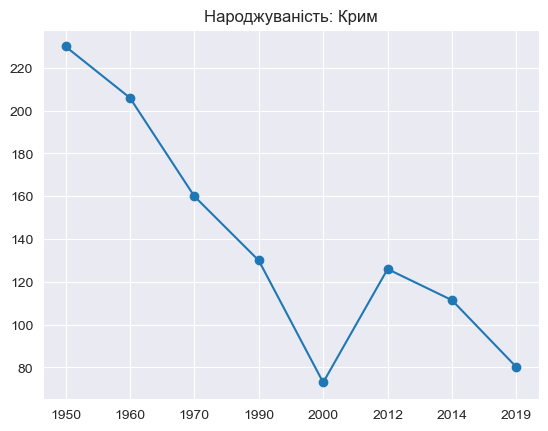

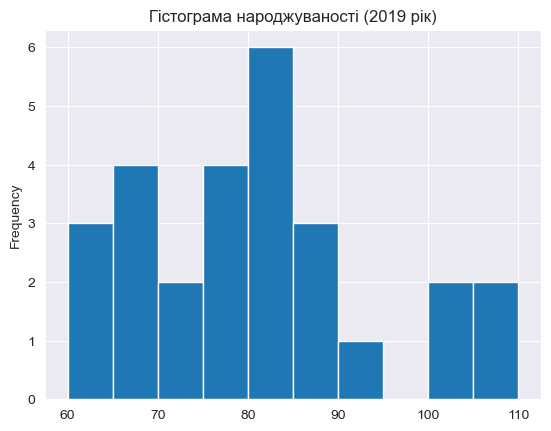

In [17]:
df.head(5).plot(x='Регіон', y='2019', kind='bar', title='Народжуваність у 2019 році (Топ-5 регіонів)')
plt.show()

years = ['1950', '1960', '1970', '1990', '2000', '2012', '2014', '2019']
df.loc[0, years].plot(kind='line', title='Народжуваність: ' + df.loc[0, 'Регіон'], marker='o')
plt.show()

df['2019'].plot(kind='hist', title='Гістограма народжуваності (2019 рік)')
plt.show()